In [ ]:
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.8.0'

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 학습데이터
train_images.shape # 샘플의 개수와 가로 세로 size

(60000, 28, 28)

In [ ]:
 # 60000개중에 첫 번째 이미지 추출
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
len(train_labels)

60000

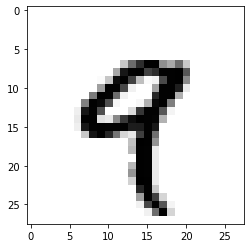

In [ ]:
import matplotlib.pyplot as plt

# 4번째 이미지 추출
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#[과제] 신경망 구성, 컴파일, mnist 데이터로 학습 및 평가

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

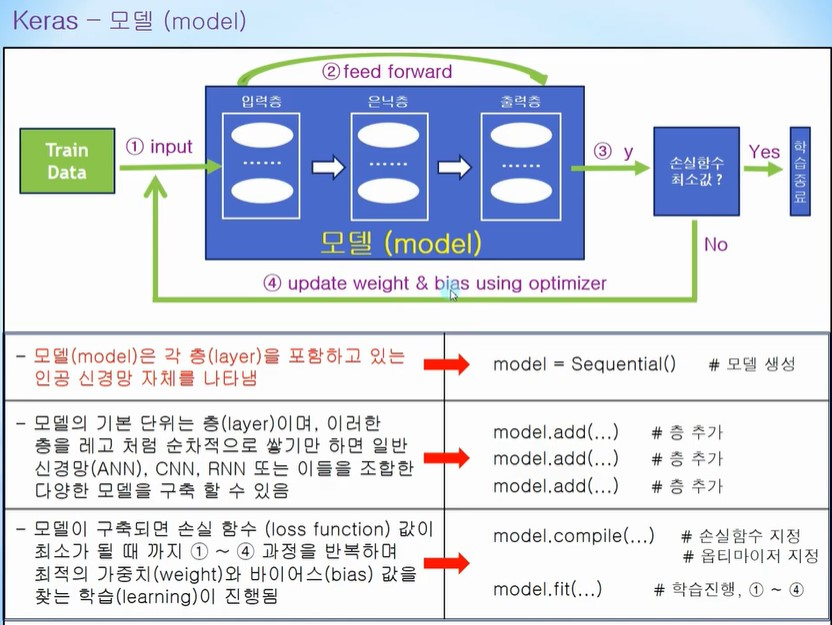

In [ ]:
from PIL import Image
from IPython.display import Image
Image('/content/drive/MyDrive/cakd5_colab/m9_딥러닝알고리즘구현/datasets/keras.jpg')

# 훈련 세트와 테스트 세트 로드

- 입력 이미지의 데이터 타입은 실수형으로, 훈련 데이터(train_images)는 (60000,784)크기, 테스트 데이터는(test_images)는 (10000,784)크기의 배열로 저장된다.

In [38]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

In [22]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 신경망 생성

## 작업 순서
- 훈련 데이터 train_images와 train_labels를 네트워크에 주입한다.
- 그러면 네트워크는 이미지와 레이블을 연관 시킬 수 있도록 학습된다.
- 마지막으로 test_images에 대한 예측을 네트워크에 요청한다.
- 그리고 이 예측이 test_labels와 맞는지 확인한다.

- softmax 함수는 출력값이 여러 개로 주어지고, 목표치가 다범주인 경우 각 범주에 속할 사후확률을 제공하는 활성함수이다.

- Relu 함수는 0보다 작으면 0으로 출력, 0보다 크면 그대로 출력해주는 활성함수이다.

- 이 모델은 2개의 Dense층이 연결되어 있고 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용한다.

In [39]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # 입력층과 은닉층이 같이 사용
network.add(layers.Dense(10, activation='softmax')) # 출력층에서 softmax를 사용

# 네트워크 컴파일

In [40]:
network.compile(optimizer='rmsprop', # 학습 과정에서의 최적화 방식을 설정
                loss='categorical_crossentropy', # 훈련 데이터에서 신경망 성능을 측정하는 방법
                metrics=['accuracy']) # 훈련과 테스트 과정을 모니터링하기 위한 지표

# 데이터 스케일

- 훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정한다.

- 앞에서 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의(60000, 28*28) 크기를 가진 배열로 저장되어있다. 그것을 0과 1사이의 값을 가지는 배열로 바꿔준다.

In [41]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [42]:
test_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# 훈련 반복

In [44]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- fit 메서드 호출하여 훈련 데이터에 모델을 학습시킨다.
- 훈련 하는 동안 훈련 데이터에 대한 네트워크 손실과 정확도가 출력된다.

In [45]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2547 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1041 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0381 - accuracy: 0.9885


- 최종적으로 테스트 세트에서도 모델이 잘 작동하는지 확인한다.

In [46]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9805
test_acc: 0.9804999828338623


# 전체 코드

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2234 - accuracy: 0.9352
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0913 - accuracy: 0.9723
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0620 - accuracy: 0.9816
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0456 - accuracy: 0.9869
Epoch 5/10
938/938 [========================

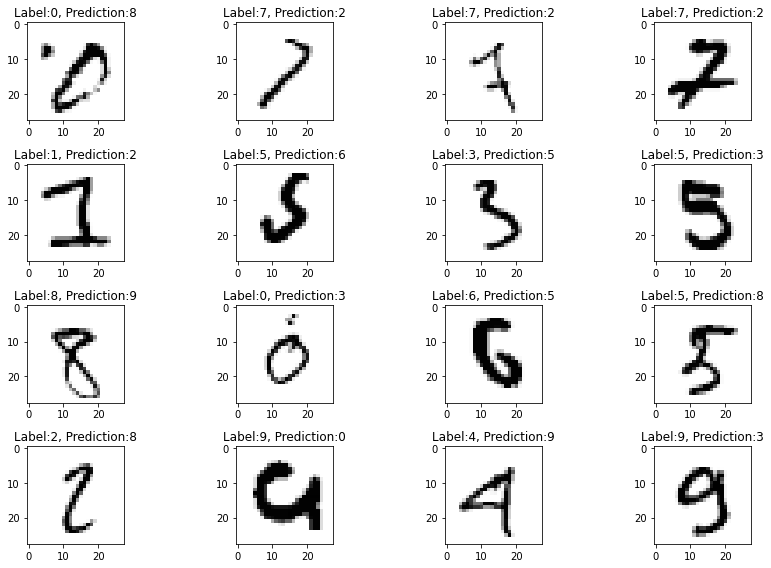

In [52]:
# 필요한 라이브러리 불러오기
from keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 이미지 데이터 준비하기 (모델에 맞는 크기로 바꾸고 0과 1사이로 스케일링)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 레이블을 범주형으로 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 모델 정의하기 (여기에서는 Sequential 클래스 사용)
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

# 구 조확인
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

# 모델 컴파일 하기
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# fit() 메서드로 모델 훈련 시키기
history=model.fit(train_images, train_labels,epochs=10, batch_size=64, verbose=1)
# batch size가 높을수록, 속도빠르고, 정화도가 낮아.

# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다.

#결과파악.

import random
import numpy as np
predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis=1)

test_label = np.argmax(test_labels, axis=1)

wrong_result = []

for n in range(0, len(test_label)):
    if predicted_labels[n] != test_label[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(test_images[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_label[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

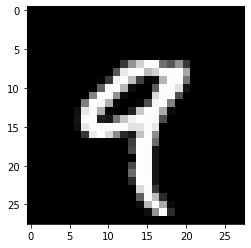

train_image 4번째 라벨은 9
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


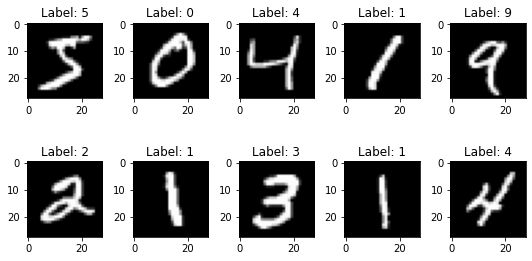

In [53]:
from keras.datasets import mnist

# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import matplotlib.pyplot as plt
#train image의 4번째 이미지 추출
image = train_images[4]

#plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("train_image 4번째 라벨은", train_labels[4])

num = 10
images = train_images[:num]
labels = train_labels[:num]

num_row = 2
num_col = 5

#plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    print(i//num_col, i%num_col)
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()